In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

In [4]:
data[:7]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ]])

In [33]:
#Plot data exercise
def plotData(data):
    fig, ax = plt.subplots()
    tmp = data[:, 2] == 1
    ax.scatter(data[tmp,0],data[tmp,1],c='blue', label = 'Blue')
    tmp = data[:, 2] == 0
    ax.scatter(data[tmp,0],data[tmp,1],marker = 'x', c='red', label = 'Red')
    ax.legend()
    plt.show()

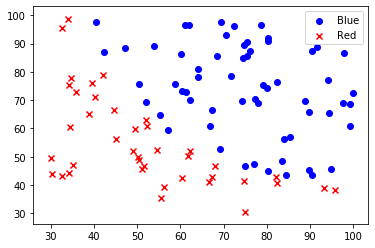

In [34]:
plotData(data)

In [49]:
#Sigmoid function exercise
def sigmoid(x):
    return 1. / (1 + np.exp(-x))""

In [54]:
x = np.array([[1, 1000000], [0, -1]])
x

array([[      1, 1000000],
       [      0,      -1]])

In [55]:
sigmoid(x)

array([[0.73105858, 1.        ],
       [0.5       , 0.26894142]])

In [115]:
#Costfunction and gradient exercise
def costFunction(theta, x, y):
    J = 0.
    grad = np.zeros(len(theta))
    Sum = 0.
    m = len(y)
    tmp_mas = np.array(theta)
    for i in range(m):
        Sum += (-y[i] * np.log(sigmoid(np.dot(tmp_mas.T,x[i]))) - \
              (1. - y[i]) * np.log(1 - sigmoid(np.dot(tmp_mas.T,x[i]))))
    Sum /= m
    J = Sum
    for j in range(len(theta)):
        Sum = 0.
        for i in range(m):
            Sum += (sigmoid(np.dot(tmp_mas.T, x[i])) - y[i]) * x[i][j]
        Sum /= m
        grad[j] = Sum
    return (J, grad)

In [117]:
#Works right on the example
costFunction([0, 0], data[:, :2], data[:, 2])

(0.6931471805599458, array([-12.00921659, -11.26284221]))

In [145]:
#Predict function exercise
def predict(theta, x):
    m = len(x)
    x = np.array(x)
    p = np.zeros(m)
    for i in range(m):
        if sigmoid(np.dot(theta.T, x[i])) >= 0.5:
            p[i] = 1
    return p

In [149]:
predict(np.array([0.01, -0.01]), data[:, :2])[:5]

array([0., 0., 0., 0., 1.])

In [152]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
data[:7]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ],
       [-0.52477 ,  0.2098  ,  1.      ],
       [-0.39804 ,  0.034357,  1.      ]])

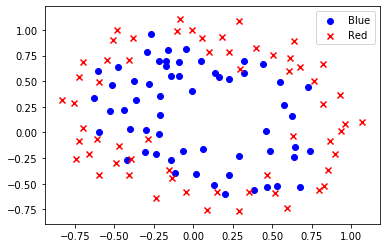

In [153]:
plotData(data)

In [154]:
#costFunction with regularization exercise
def costFunctionReg(theta, x, y, lam):
    m = len(y)
    J = 0.
    n = len(theta)
    grad = np.zeros(len(theta))
    reg_par = 0.
    for j in range(1, n):
        reg_par += theta[j] ** 2
    reg_par *= (lam / (2 * m))
    
    Sum = 0.
    for i in range(m):
        Sum += (-y[i] * np.log(sigmoid(np.dot(theta.T,x[i]))) - \
              (1. - y[i]) * np.log(1 - sigmoid(np.dot(theta.T,x[i]))))
    Sum /= m
    J = Sum + reg_par
    
    for j in range(1, len(theta)):
        Sum = 0.
        for i in range(m):
            Sum += (sigmoid(np.dot(theta.T, x[i])) - y[i]) * x[i][j]
        Sum /= m
        Sum += theta[j] * lam / m
        grad[j] = Sum
    Sum = 0.
    for i in range(m):
        Sum += (sigmoid(np.dot(theta.T, x[i])) - y[i]) * x[i][0]
    Sum /= m
    grad[0] = Sum
    
    return (J, grad)

In [155]:
#Works right
costFunctionReg(np.array([0, 0]), data[:, :2], data[:, 2], 0)

(0.6931471805599461, array([1.87880932e-02, 7.77711864e-05]))